# Introduction to Pandas

Python has long been great for data munging and preparation, but less so for data analysis and modeling. Pandas library helps fill this gap, enabling the entire data analysis workflow in Python without having to switch to a more domain specific language like R or tools like Excel.

Combined with the excellent IPython toolkit and other libraries, the environment for doing data analysis in Python excels in performance, productivity, and the ability to collaborate.

Pandas does not implement significant modeling functionality outside of linear and panel regression; for this, look to statsmodels and scikit-learn. Pandas can be viewed as an extremely powerful version of Excel, with a lot more features. The following basic concepts of Pandas are covered in this lecture.

- Series
- DataFrames
- Missing Data
- GroupBy
- Operations
- Data Input and Output

## Series

An important datatype for Pandas is the Series data type. Let's import Pandas and explore the Series object.

A Series is very similar to a NumPy array (in fact it is built on top of the NumPy array object). 
The two main difference between the NumPy array and a Series, is that: 
- A Series can have axis labels. Axis labels refers to the capability of indexing the Series by a label, instead of just a number location. 
- A Series also doesn't need to hold numeric data, it can hold any arbitrary Python Object.

Some example Series are shown below: 


In [370]:
#import the libraries
import numpy as np
import pandas as pd

### Creating a Series

Series can be generated/converted from any one of the following: 
- list,
- numpy array, 
- dictionary  - will look at the dictionary in webinar and add creating series from dictionary in the webinar/tutorial!


In [371]:
#Create each of the objects mentioned above - list, numpy array amd dictionary.
my_labels = ['x','y','z']
my_list = [100,200,300]
my_nparr = np.array([100,200,300])
d = {'a':10,'b':20,'c':30}

**Generate from Lists**

In [372]:
# Initiate Series with lists
pd.Series(data=my_list)

0    100
1    200
2    300
dtype: int64

In [373]:
#Initiate Series with list and labels
pd.Series(data=my_list,index=my_labels)

x    100
y    200
z    300
dtype: int64

In [375]:
#Need not specify keywords data and labels if order is preserved. 
pd.Series(my_list,my_labels)

x    100
y    200
z    300
dtype: int64

**Generate from NumPy Arrays**

In [376]:
#Create from NumPy Arrays
pd.Series(my_nparr)

0    100
1    200
2    300
dtype: int64

In [377]:
pd.Series(my_nparr,my_labels)

x    100
y    200
z    300
dtype: int64

**Dictionary**

In [378]:
pd.Series(d)

a    10
b    20
c    30
dtype: int64

### Datatypes in a Series

A pandas Series does not have restrictions on the datatype. It can even hold a variety of object types in a the same Series. 

In [379]:
#String data types in a Series.
pd.Series(data=my_labels)

0    x
1    y
2    z
dtype: object

In [380]:
#Different data types mixed together
pd.Series(["alpha","0034",23])

0    alpha
1     0034
2       23
dtype: object

In [381]:
# Even functions (although unlikely that you will use this)
pd.Series([sum,print,len])


0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

## How to use Index in Series

Series is a very useful Panda object with the indexing mechanism. The key is understanding the index of the Series. Index as shown above can be numbers or names. This helps Pandas for fast look ups of information (works like a hash table or dictionary).


In [382]:
#Create a series of Weekdays Information
EU_day_series = pd.Series([1,2,3,4,5],index = ['Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday'])                                   

In [383]:
EU_day_series

Monday       1
Tuesday      2
Wednesday    3
Thursday     4
Friday       5
dtype: int64

In [385]:
#Create a new day series based on the weekdays in Arab countries
Gulf_day_series = pd.Series([1,2,3,4,7],index = ['Monday', 'Tuesday','Wednesday', 'Thursday', 'Sunday'])                                   

In [386]:
Gulf_day_series

Monday       1
Tuesday      2
Wednesday    3
Thursday     4
Sunday       7
dtype: int64

In [387]:
EU_day_series['Monday']

1

In [34]:
EU_day_series.loc['Monday']

1

In [33]:
EU_day_series.iloc[0]

1

Operations can be performed on the series based on their index:

In [35]:
#No guarantee that the order of the sequence would be maintained.
EU_day_series + Gulf_day_series

Friday       NaN
Monday       2.0
Sunday       NaN
Thursday     8.0
Tuesday      4.0
Wednesday    6.0
dtype: float64

# DataFrames

One of the most important feature of Pandas is the DataFrame. 

Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. Pandas DataFrame consists of three principal components, the data, rows, and columns.

DataFrames are the workhorse of pandas and are directly inspired by the R programming language. We can think of a DataFrame as a bunch of Series objects put together to share the same index. Check out some basic usage of dataframes below: 


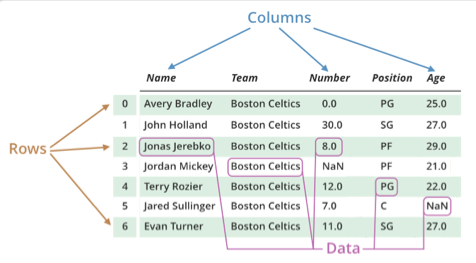

In [3]:
# ONLY FOR ILLUSTRATION PURPOSES
# DONOT TRY TO RUN THIS COMMAND AS YOU DONT HAVE THIS IMAGE FILE!!! 
from IPython.display import Image 
Image("Dataframe.png")

In [1]:
#import the libraries if not already done so...
import pandas as pd
import numpy as np

In [2]:
#Initate a random number generator to generaate some data
from numpy.random import randn
np.random.seed(10)
randn(5,3)



array([[ 1.3315865 ,  0.71527897, -1.54540029],
       [-0.00838385,  0.62133597, -0.72008556],
       [ 0.26551159,  0.10854853,  0.00429143],
       [-0.17460021,  0.43302619,  1.20303737],
       [-0.96506567,  1.02827408,  0.22863013]])

In [390]:
np.random.seed(10)

#Create dataframe using rows and column labels.
my_df = pd.DataFrame(randn(5,3),index='Row1 Row2 Row3 Row4 Row5'.split(),columns='Col1 Col2 Col3'.split())
my_df

,Col1,Col2,Col3
Row1,1.331587,0.715279,-1.545400
Row2,-0.008384,0.621336,-0.720086
Row3,0.265512,0.108549,0.004291
Row4,-0.174600,0.433026,1.203037
Row5,-0.965066,1.028274,0.228630


## Selection and Indexing

Again, similar to lists or arrays, index can be used to access data from a DataFrame. Columns are Series and can be straight forward to index using column names or number. Rows are special as they need the loc() or iloc() function to use the index


<div class="Note" style="background-color: #82CAFA; border-left: 12px solid #3BB9FF; padding=12px;">
  <p style="color:black;font-size:16px; padding=12px;"><strong> Note: </strong>  <br> Columns are Series and can be straight forward to index using column names or number. <br> Rows are special as they need the loc() or iloc() function to use the index</p>
</div>


In [215]:
#Select a single column
my_df['Col2']

Row1    0.715279
Row2    0.621336
Row3    0.108549
Row4    0.433026
Row5    1.028274
Name: Col2, dtype: float64

In [408]:
# Pass a list of column names
my_df[['Col2','Col1']]

,Col2,Col1
Row1,0.715279,1.331587
Row2,0.621336,-0.008384
Row3,0.108549,0.265512
Row4,0.433026,-0.174600
Row5,1.028274,-0.965066


***Each DataFrame Column is just a Series***

In [410]:
type(my_df['Col1'])

pandas.core.series.Series

In [409]:
type(my_df)

pandas.core.frame.DataFrame

**Creating a new column:**

In [420]:
my_df['Col4_new'] = my_df['Col2'] + my_df['Col3']

In [421]:
my_df

,Col1,Col2,Col3,Col4_new
Row1,1.331587,0.715279,-1.545400,-0.830121
Row2,-0.008384,0.621336,-0.720086,-0.098750
Row3,0.265512,0.108549,0.004291,0.112840
Row4,-0.174600,0.433026,1.203037,1.636064
Row5,-0.965066,1.028274,0.228630,1.256904


**Removing Columns**

In [414]:
my_df.drop('Col4_new',axis=1)

,Col1,Col2,Col3
Row1,1.331587,0.715279,-1.545400
Row2,-0.008384,0.621336,-0.720086
Row3,0.265512,0.108549,0.004291
Row4,-0.174600,0.433026,1.203037
Row5,-0.965066,1.028274,0.228630


In [422]:
# Not inplace unless specified!
my_df

,Col1,Col2,Col3,Col4_new
Row1,1.331587,0.715279,-1.545400,-0.830121
Row2,-0.008384,0.621336,-0.720086,-0.098750
Row3,0.265512,0.108549,0.004291,0.112840
Row4,-0.174600,0.433026,1.203037,1.636064
Row5,-0.965066,1.028274,0.228630,1.256904


In [423]:
#This time remove from the object
my_df.drop('Col4_new',axis=1,inplace=True)

In [424]:
my_df

,Col1,Col2,Col3
Row1,1.331587,0.715279,-1.545400
Row2,-0.008384,0.621336,-0.720086
Row3,0.265512,0.108549,0.004291
Row4,-0.174600,0.433026,1.203037
Row5,-0.965066,1.028274,0.228630


In [425]:
# Rows can also be dropped this way:
my_df.drop('Row5',axis=0)

,Col1,Col2,Col3
Row1,1.331587,0.715279,-1.545400
Row2,-0.008384,0.621336,-0.720086
Row3,0.265512,0.108549,0.004291
Row4,-0.174600,0.433026,1.203037


**Selecting Rows**

In [426]:
# Select Row3
my_df.loc['Row3']

Col1    0.265512
Col2    0.108549
Col3    0.004291
Name: Row3, dtype: float64

In [427]:
# Rows can also be selected based on position instead of label
my_df.iloc[2]

Col1    0.265512
Col2    0.108549
Col3    0.004291
Name: Row3, dtype: float64

**Selecting subset of rows and columns**

In [428]:
# Select a single element
my_df.loc['Row2','Col2']

0.6213359738904805

In [429]:
# Select a slice of the dataframe
my_df.loc[['Row1','Row2'],['Col2','Col3']]

,Col2,Col3
Row1,0.715279,-1.545400
Row2,0.621336,-0.720086


### Conditional Selection

Similar to NumPy Arrays, dataframes can also be conditionally accessed and boolean Index can be used. An important feature of pandas is conditional selection using bracket notation. 

In [430]:
# Check out our dataframe
my_df

,Col1,Col2,Col3
Row1,1.331587,0.715279,-1.545400
Row2,-0.008384,0.621336,-0.720086
Row3,0.265512,0.108549,0.004291
Row4,-0.174600,0.433026,1.203037
Row5,-0.965066,1.028274,0.228630


In [431]:
# Check if some values are non-negative 
my_df>0

,Col1,Col2,Col3
Row1,True,True,False
Row2,False,True,False
Row3,True,True,True
Row4,False,True,True
Row5,False,True,True


In [432]:
#Select the values that are non-negative
my_df[my_df>0]

,Col1,Col2,Col3
Row1,1.331587,0.715279,NaN
Row2,NaN,0.621336,NaN
Row3,0.265512,0.108549,0.004291
Row4,NaN,0.433026,1.203037
Row5,NaN,1.028274,0.228630


In [433]:
# Find the rows for which col2 has a non-negative value
my_df[my_df['Col2']>0.4]

,Col1,Col2,Col3
Row1,1.331587,0.715279,-1.545400
Row2,-0.008384,0.621336,-0.720086
Row4,-0.174600,0.433026,1.203037
Row5,-0.965066,1.028274,0.228630


In [434]:
# Find the rows in Col1 for which Col2 has non-negative values
my_df[my_df['Col2']>0]['Col1']

Row1    1.331587
Row2   -0.008384
Row3    0.265512
Row4   -0.174600
Row5   -0.965066
Name: Col1, dtype: float64

In [435]:
# Find the rows in Col1 and Col3 for which Col2 has non-negative values
my_df[my_df['Col2']>0.5][['Col1','Col3']]

,Col1,Col3
Row1,1.331587,-1.545400
Row2,-0.008384,-0.720086
Row5,-0.965066,0.228630


For two conditions you can use | and & with parenthesis:

In [436]:
# Conditioned on values of two columns
my_df[(my_df['Col2']>0.5) & (my_df['Col1'] > 0)]

,Col1,Col2,Col3
Row1,1.331587,0.715279,-1.5454


## More Index Details

Let's discuss some more features of indexing, including resetting the index or setting it something else. We'll also talk about index hierarchy!

In [437]:
# Check on our dataframe
my_df

,Col1,Col2,Col3
Row1,1.331587,0.715279,-1.545400
Row2,-0.008384,0.621336,-0.720086
Row3,0.265512,0.108549,0.004291
Row4,-0.174600,0.433026,1.203037
Row5,-0.965066,1.028274,0.228630


In [438]:
# Reset to default 0,1...n index
my_df.reset_index()

,index,Col1,Col2,Col3
0,Row1,1.331587,0.715279,-1.545400
1,Row2,-0.008384,0.621336,-0.720086
2,Row3,0.265512,0.108549,0.004291
3,Row4,-0.174600,0.433026,1.203037
4,Row5,-0.965066,1.028274,0.228630


In [439]:
#Add a new index column
newind = 'ind1 ind2 ind3 ind4 ind4'.split()

In [441]:
my_df['NewInd'] = newind

In [442]:
my_df

,Col1,Col2,Col3,NewInd
Row1,1.331587,0.715279,-1.545400,ind1
Row2,-0.008384,0.621336,-0.720086,ind2
Row3,0.265512,0.108549,0.004291,ind3
Row4,-0.174600,0.433026,1.203037,ind4
Row5,-0.965066,1.028274,0.228630,ind4


In [443]:
#Set this as our new index column
my_df.set_index('NewInd')

,Col1,Col2,Col3
NewInd,,,
ind1,1.331587,0.715279,-1.545400
ind2,-0.008384,0.621336,-0.720086
ind3,0.265512,0.108549,0.004291
ind4,-0.174600,0.433026,1.203037
ind4,-0.965066,1.028274,0.228630


In [444]:
#Was it inplace?
my_df

,Col1,Col2,Col3,NewInd
Row1,1.331587,0.715279,-1.545400,ind1
Row2,-0.008384,0.621336,-0.720086,ind2
Row3,0.265512,0.108549,0.004291,ind3
Row4,-0.174600,0.433026,1.203037,ind4
Row5,-0.965066,1.028274,0.228630,ind4


In [445]:
# Change the index in place
my_df.set_index('NewInd',inplace=True)

In [446]:
#Did it change now?
my_df

,Col1,Col2,Col3
NewInd,,,
ind1,1.331587,0.715279,-1.545400
ind2,-0.008384,0.621336,-0.720086
ind3,0.265512,0.108549,0.004291
ind4,-0.174600,0.433026,1.203037
ind4,-0.965066,1.028274,0.228630


____

# Multi-Index and Index Hierarchy

Data Frames can also have multi-level or hierarchical indexing. Following example shows how to create a Multi-Indexed DataFrame.

In [447]:
import pandas as pd
import numpy as np
## Index Levels
level1_year = ['2018','2018','2018','2019','2019','2019']
level2_month = ['Jan','Feb','Mar','Jan','Feb','Mar']
hier_index = tuple(zip(level1_year,level2_month))
hier_index = pd.MultiIndex.from_tuples(hier_index)
type(hier_index)


pandas.core.indexes.multi.MultiIndex


<div class="Note" style="background-color: #82CAFA; border-left: 12px solid #3BB9FF; padding=12px;">
  <p style="color:black;font-size:16px; padding=12px;"><strong> Note: </strong>  <br> the hier_index is an iterator of tuples. The zip() function take iterables (can be zero or more), makes iterator that aggregates elements based on the iterables passed, and returns an iterator of tuples. </p>
</div>


In [448]:
# Show the hierarchical index
hier_index

MultiIndex(levels=[['2018', '2019'], ['Feb', 'Jan', 'Mar']],
           codes=[[0, 0, 0, 1, 1, 1], [1, 0, 2, 1, 0, 2]])

In [449]:
#Generate some data to fill in. 
np.random.seed(100)
multi_df = pd.DataFrame(np.random.randn(6,2)*1000,index=hier_index,columns=['Sales1','Sales2'])
multi_df

Sales1       Sales2
2018 Jan -1749.765473   342.680403
     Feb  1153.035803  -252.436037
     Mar   981.320787   514.218841
2019 Jan   221.179669 -1070.043331
     Feb  -189.495831   255.001444
     Mar  -458.026986   435.163488

In [450]:
multi_df.loc['2018','Jan']

Sales1   -1749.765473
Sales2     342.680403
Name: (2018, Jan), dtype: float64

In [451]:
multi_df.loc['2018']

,Sales1,Sales2
Jan,-1749.765473,342.680403
Feb,1153.035803,-252.436037
Mar,981.320787,514.218841


<div class="Note" style="background-color: #82CAFA; border-left: 12px solid #3BB9FF; padding=12px;">
  <p style="color:black;font-size:16px; padding=12px;"><strong> Note: </strong>  <br> 
      Hierarchical index can be accessed using loc(). <br> The index of column axis is just a normal bracket notation "[]". <br> Each level of index returns a sub-dataframe.  </p>
</div>


In [264]:
# access the top level hierarchy
multi_df.loc['2018']

,Sales1,Sales2
Jan,-1749.765473,342.680403
Feb,1153.035803,-252.436037
Mar,981.320787,514.218841


In [265]:
# Access two levels of index
multi_df.loc['2018'].loc['Jan']

Sales1   -1749.765473
Sales2     342.680403
Name: Jan, dtype: float64

In [452]:
# Check the index names
multi_df.index.names

FrozenList([None, None])

In [268]:
# Set Index names
multi_df.index.names = ['Year','Month']

In [269]:
multi_df

Sales1       Sales2
Year Month                          
2018 Jan   -1749.765473   342.680403
     Feb    1153.035803  -252.436037
     Mar     981.320787   514.218841
2019 Jan     221.179669 -1070.043331
     Feb    -189.495831   255.001444
     Mar    -458.026986   435.163488

#### Access a cross section of the data frame
xs() is a function that returns cross-section from the original Series or DataFrame corresponding to the selected index levels.

In [270]:
# Find the sub-dataframe
multi_df.xs('2018')

,Sales1,Sales2
Month,,
Jan,-1749.765473,342.680403
Feb,1153.035803,-252.436037
Mar,981.320787,514.218841


In [271]:
# Multiple levels can be accesed
multi_df.xs(['2018','Jan'])

Sales1   -1749.765473
Sales2     342.680403
Name: (2018, Jan), dtype: float64

In [272]:
# Different levels can be accessed even skipped. 
multi_df.xs('Feb',level='Month')

,Sales1,Sales2
Year,,
2018,1153.035803,-252.436037
2019,-189.495831,255.001444


<html> <h2 style="font-style:italic; color:#FF0000;"> Try Out the following set of exercises. </h2> </html>

In [2]:
import pandas as pd
import numpy as np
 
#Create a DataFrame
d = {
    'Name':['Alisa','Bobby','Cathrine','Alisa','Bobby','Cathrine',
            'Alisa','Bobby','Cathrine','Alisa','Bobby','Cathrine'],
    'Exam':['Semester 1','Semester 1','Semester 1','Semester 1','Semester 1','Semester 1',
            'Semester 2','Semester 2','Semester 2','Semester 2','Semester 2','Semester 2'],
     
    'Subject':['Mathematics','Mathematics','Mathematics','Science','Science','Science',
               'Mathematics','Mathematics','Mathematics','Science','Science','Science'],
   'Score':[62,47,55,74,31,77,85,63,42,67,89,81]}
 
df = pd.DataFrame(d,columns=['Name','Exam','Subject','Score']).set_index(['Exam', 'Subject'])
df

Name  Score
Exam       Subject                     
Semester 1 Mathematics     Alisa     62
           Mathematics     Bobby     47
           Mathematics  Cathrine     55
           Science         Alisa     74
           Science         Bobby     31
           Science      Cathrine     77
Semester 2 Mathematics     Alisa     85
           Mathematics     Bobby     63
           Mathematics  Cathrine     42
           Science         Alisa     67
           Science         Bobby     89
           Science      Cathrine     81

In [22]:
# Extract all the Semester 2 results
#df.loc['Semester 2']
df.xs('Semester 2')

,Name,Score
Subject,,
Mathematics,Alisa,85
Mathematics,Bobby,63
Mathematics,Cathrine,42
Science,Alisa,67
Science,Bobby,89
Science,Cathrine,81


,Name,Score
Subject,,
Mathematics,Alisa,85
Mathematics,Bobby,63
Mathematics,Cathrine,42
Science,Alisa,67
Science,Bobby,89
Science,Cathrine,81


In [24]:
#Extract the Science scores for Semester 1
#df.loc['Semester 1', 'Science']
df.xs(['Semester 1', 'Science'])

Name  Score
Exam       Subject                 
Semester 1 Science     Alisa     74
           Science     Bobby     31
           Science  Cathrine     77

Name  Score
Exam       Subject                 
Semester 1 Science     Alisa     74
           Science     Bobby     31
           Science  Cathrine     77

In [26]:
#Find all the scores for Mathematics
# HINT: Use swaplevel()
#df.swaplevel().loc['Mathematics']
df.xs('Mathematics', level='Subject')

,Name,Score
Exam,,
Semester 1,Alisa,62
Semester 1,Bobby,47
Semester 1,Cathrine,55
Semester 2,Alisa,85
Semester 2,Bobby,63
Semester 2,Cathrine,42


,Name,Score
Exam,,
Semester 1,Alisa,62
Semester 1,Bobby,47
Semester 1,Cathrine,55
Semester 2,Alisa,85
Semester 2,Bobby,63
Semester 2,Cathrine,42


____

# Missing Data

It is not necessary to have all the data points in a data set. Some values could be missing even by design. 

Here are a few convenient methods to deal with Missing Data in pandas. Missing data is usually represented by "nan".

In [453]:
import numpy as np
import pandas as pd

In [454]:
#Imagine a dataframe with some missing data.
md_df = pd.DataFrame({'Alex':[70,85,np.nan],
                  'Ben':[95,np.nan,np.nan],
                  'Charlie':[60,75,80]})


In [455]:
md_df

,Alex,Ben,Charlie
0,70.0,95.0,60
1,85.0,NaN,75
2,NaN,NaN,80


In [456]:
Sub_Ind = ['Maths', 'Biology', 'Economics']
md_df['Sub_Ind'] = Sub_Ind
md_df.set_index('Sub_Ind', inplace=True)
md_df

,Alex,Ben,Charlie
Sub_Ind,,,
Maths,70.0,95.0,60
Biology,85.0,NaN,75
Economics,NaN,NaN,80


In [457]:
# Drop the rows with NaN values. Find the subject taken by all the students.
md_df.dropna()

,Alex,Ben,Charlie
Sub_Ind,,,
Maths,70.0,95.0,60


In [458]:
# Drop the columns with Nan. Find the students studying all the subjects.
md_df.dropna(axis=1)

,Charlie
Sub_Ind,
Maths,60
Biology,75
Economics,80


In [459]:
# Set a threshold for dropping elements. Find the subject taken by atleast two students.
md_df.dropna(thresh=2)

,Alex,Ben,Charlie
Sub_Ind,,,
Maths,70.0,95.0,60
Biology,85.0,NaN,75


In [460]:
md_df

,Alex,Ben,Charlie
Sub_Ind,,,
Maths,70.0,95.0,60
Biology,85.0,NaN,75
Economics,NaN,NaN,80


In [279]:
# Fill Nans with some values. 
md_df.fillna(value='FILL VALUE')

,Alex,Ben,Charlie
Sub_Ind,,,
Maths,70,95,60
Biology,85,FILL VALUE,75
Economics,FILL VALUE,FILL VALUE,80


In [461]:
# Fill in the Nan with means
md_df['Alex'].fillna(value=md_df['Alex'].mean())

Sub_Ind
Maths        70.0
Biology      85.0
Economics    77.5
Name: Alex, dtype: float64

# Groupby

The groupby method allows you to group rows of data together and call aggregate functions

In [462]:
import pandas as pd
# Create dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}

In [463]:
df = pd.DataFrame(data)

In [464]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


**Now you can use the .groupby() method to group rows together based off of a column name. For instance let's group based off of Company. This will create a DataFrameGroupBy object:**

In [465]:
df.groupby('Company')

You can save this object as a new variable:

In [466]:
by_comp = df.groupby("Company")

And then call aggregate methods off the object:

In [467]:
by_comp.mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [287]:
df.groupby('Company').mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


More examples of aggregate methods:

In [288]:
by_comp.std()

,Sales
Company,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


In [293]:
#NOTE it gives min in each column not just sales. The data is not valid anymore... 
by_comp.min()

,Person,Sales
Company,,
FB,Carl,243
GOOG,Charlie,120
MSFT,Amy,124


In [291]:
#NOTE it gives min in each column not just sales. The data is not valid anymore... 
by_comp.max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


In [468]:
by_comp.count()

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


In [469]:
by_comp.describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [470]:
by_comp.describe().transpose()

Company              FB        GOOG        MSFT
Sales count    2.000000    2.000000    2.000000
      mean   296.500000  160.000000  232.000000
      std     75.660426   56.568542  152.735065
      min    243.000000  120.000000  124.000000
      25%    269.750000  140.000000  178.000000
      50%    296.500000  160.000000  232.000000
      75%    323.250000  180.000000  286.000000
      max    350.000000  200.000000  340.000000

In [471]:
by_comp.describe().transpose()['GOOG']

Sales  count      2.000000
       mean     160.000000
       std       56.568542
       min      120.000000
       25%      140.000000
       50%      160.000000
       75%      180.000000
       max      200.000000
Name: GOOG, dtype: float64

In [296]:
by_comp.groups

{'FB': Int64Index([4, 5], dtype='int64'),
 'GOOG': Int64Index([0, 1], dtype='int64'),
 'MSFT': Int64Index([2, 3], dtype='int64')}

<html> <h2 style="font-style:italic; color:#FF0000;"> Try Out the following set of exercises. </h2> </html>

In [1]:
import pandas as pd
import numpy as np
 
#Create a DataFrame
d = {
    'Name':['Alisa','Bobby','Cathrine','Alisa','Bobby','Cathrine',
            'Alisa','Bobby','Cathrine','Alisa','Bobby','Cathrine'],
    'Exam':['Semester 1','Semester 1','Semester 1','Semester 1','Semester 1','Semester 1',
            'Semester 2','Semester 2','Semester 2','Semester 2','Semester 2','Semester 2'],
     
    'Subject':['Mathematics','Mathematics','Mathematics','Science','Science','Science',
               'Mathematics','Mathematics','Mathematics','Science','Science','Science'],
   'Score':[62,47,55,74,31,77,85,63,42,67,89,81]}
 
df = pd.DataFrame(d,columns=['Name','Exam','Subject','Score']).set_index(['Exam', 'Subject'])
df


Name  Score
Exam       Subject                     
Semester 1 Mathematics     Alisa     62
           Mathematics     Bobby     47
           Mathematics  Cathrine     55
           Science         Alisa     74
           Science         Bobby     31
           Science      Cathrine     77
Semester 2 Mathematics     Alisa     85
           Mathematics     Bobby     63
           Mathematics  Cathrine     42
           Science         Alisa     67
           Science         Bobby     89
           Science      Cathrine     81

In [30]:
# Extract total marks scored by each student in all subjects
df.groupby('Name').sum()

,Score
Name,
Alisa,288
Bobby,230
Cathrine,255


,Score
Name,
Alisa,288
Bobby,230
Cathrine,255


In [33]:
# Find the average scores for each subject across both Semesters and all students
df.groupby('Subject').mean()

,Score
Subject,
Mathematics,59.000000
Science,69.833333


,Score
Subject,
Mathematics,59.000000
Science,69.833333


In [34]:
#get all the groups by grouping based on Subject. HINT: Use groups attribute
df.groupby('Subject').groups

{'Mathematics': MultiIndex(levels=[['Semester 1', 'Semester 2'], ['Mathematics', 'Science']],
            codes=[[0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0]],
            names=['Exam', 'Subject']),
 'Science': MultiIndex(levels=[['Semester 1', 'Semester 2'], ['Mathematics', 'Science']],
            codes=[[0, 0, 0, 1, 1, 1], [1, 1, 1, 1, 1, 1]],
            names=['Exam', 'Subject'])}

{'Mathematics': MultiIndex(levels=[['Semester 1', 'Semester 2'], ['Mathematics', 'Science']],
            codes=[[0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0]],
            names=['Exam', 'Subject']),
 'Science': MultiIndex(levels=[['Semester 1', 'Semester 2'], ['Mathematics', 'Science']],
            codes=[[0, 0, 0, 1, 1, 1], [1, 1, 1, 1, 1, 1]],
            names=['Exam', 'Subject'])}

In [68]:
#get all the groups by grouping based on 'Subject' and find the average score for Mathematics for each Semester.
#HINT: Use get_group() function.
df.groupby('Subject').groups
df.groupby('Subject').get_group('Mathematics').groupby('Exam').mean()
#df.groupby(['Subject','Exam']).groups
#df.groupby(['Subject','Exam']).mean().loc['Mathematics']

,Score
Exam,
Semester 1,54.666667
Semester 2,63.333333


In [2]:
df.groupby('Subject').groups

{'Mathematics': MultiIndex(levels=[['Semester 1', 'Semester 2'], ['Mathematics', 'Science']],
            codes=[[0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0]],
            names=['Exam', 'Subject']),
 'Science': MultiIndex(levels=[['Semester 1', 'Semester 2'], ['Mathematics', 'Science']],
            codes=[[0, 0, 0, 1, 1, 1], [1, 1, 1, 1, 1, 1]],
            names=['Exam', 'Subject'])}

,Score
Exam,
Semester 1,54.666667
Semester 2,63.333333


In [44]:
#Find sum of the total marks for each student in Semester 1
df.loc['Semester 1'].groupby('Name').sum()

,Score
Name,
Alisa,136
Bobby,78
Cathrine,132


,Score
Name,
Alisa,136
Bobby,78
Cathrine,132


In [48]:
#Describe all the aggregration details for only Semester 1 scores for each student
df.loc['Semester 1'].groupby('Name').describe()

Score                                               
         count  mean        std   min   25%   50%   75%   max
Name                                                         
Alisa      2.0  68.0   8.485281  62.0  65.0  68.0  71.0  74.0
Bobby      2.0  39.0  11.313708  31.0  35.0  39.0  43.0  47.0
Cathrine   2.0  66.0  15.556349  55.0  60.5  66.0  71.5  77.0

Score                                               
         count  mean        std   min   25%   50%   75%   max
Name                                                         
Alisa      2.0  68.0   8.485281  62.0  65.0  68.0  71.0  74.0
Bobby      2.0  39.0  11.313708  31.0  35.0  39.0  43.0  47.0
Cathrine   2.0  66.0  15.556349  55.0  60.5  66.0  71.5  77.0

____

# Operations

There are lots of operations with pandas that will be really useful, but don't fall into any distinct category. Let's see some here:

In [498]:
import pandas as pd
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


### Info on Unique Values

In [501]:
df['col2'].unique()

array([444, 555, 666])

In [325]:
df['col2'].nunique()

3

In [328]:
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

### Selecting Data

In [329]:
#Select from DataFrame using criteria from multiple columns
newdf = df[(df['col1']>2) & (df['col2']==444)]

In [330]:
newdf

,col1,col2,col3
3,4,444,xyz


### Applying Functions

In [331]:
def times2(x):
    return x*2

In [332]:
df['col1'].apply(times2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [333]:
df['col3'].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [334]:
df['col1'].sum()

10

**Permanently Removing a Column**

In [335]:
del df['col1']

In [63]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


**Get column and index names:**

In [336]:
df.columns

Index(['col2', 'col3'], dtype='object')

In [337]:
df.index

RangeIndex(start=0, stop=4, step=1)

**Sorting and Ordering a DataFrame:**

In [338]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [339]:
df.sort_values(by='col2') #inplace=False by default

,col2,col3
0,444,abc
3,444,xyz
1,555,def
2,666,ghi


**Find Null Values or Check for Null Values**

In [340]:
df.isnull()

,col2,col3
0,False,False
1,False,False
2,False,False
3,False,False


In [341]:
# Drop rows with NaN Values
df.dropna()

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


**Filling in NaN values with something else:**

In [342]:
import numpy as np

In [343]:
df = pd.DataFrame({'col1':[1,2,3,np.nan],
                   'col2':[np.nan,555,666,444],
                   'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [344]:
df.fillna('FILL')

,col1,col2,col3
0,1,FILL,abc
1,2,555,def
2,3,666,ghi
3,FILL,444,xyz


# Data Input and Output

This section is the reference code for getting input and output, pandas can read a variety of file types using its pd.read_ methods. Let's take a look at the most common data types:

In [348]:
import numpy as np
import pandas as pd

## CSV

### CSV Input

In [354]:
df = pd.read_csv('Salaries.csv')
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN


### CSV Output

In [355]:
df.to_csv('example',index=False)

In [356]:
df = pd.read_csv('example')
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN


## Excel
Pandas can read and write excel files, keep in mind, this only imports data. Not formulas or images, having images or macros may cause this read_excel method to crash. 

### Excel Input

In [363]:
pd.read_excel('sample_excel.xlsx',sheetname='Sheet1')

,Index,b1,b2
0,a1,v1,v2
1,a2,v3,v4
2,a3,v5,v6
3,a4,v7,v8
4,a5,v9,v9


### Excel Output

In [361]:
df.head().to_excel('Excel_Sample.xlsx',sheet_name='Sheet1')

## HTML

You may need to install htmllib5,lxml, and BeautifulSoup4. In your terminal/command prompt run:

    conda install lxml
    conda install html5lib
    conda install BeautifulSoup4

Then restart Jupyter Notebook.
(or use pip install if you aren't using the Anaconda Distribution)

Pandas can read table tabs off of html. For example:

### HTML Input

Pandas read_html function will read tables off of a webpage and return a list of DataFrame objects:

In [351]:
df = pd.read_html('http://www.fdic.gov/bank/individual/failed/banklist.html')

In [369]:
df.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


____